In [ ]:
# Carreggando as bibliotecas necessárias

In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(16, 8)})
sns.set_style("white")

In [229]:
# Carregando o dataframe

In [8]:
df = pd.read_csv('Teste_dados_ecommerce.csv', sep=';', encoding = 'unicode_escape')

In [228]:
# Analisando a estrutura do Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StoreId      541909 non-null  int64  
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


##### Aplicando as transformações na coluna Invoice Date para podermos analisar o mês da Fatura para responder a questão 2

In [107]:
df['InvoiceDate'] = df['InvoiceDate'].apply(lambda x: x.split(" ")[0])
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].apply(lambda x: x.month)

In [227]:
# Função que altera a coluna do mês para seu nome de acordo com o número do mês

In [134]:
def normalize_month(x):
    if x == 1:
        return 'Janeiro'
    elif x == 2:
        return 'Fevereiro'
    elif x == 3:
        return 'Março'
    elif x == 4:
        return 'Abril'
    elif x == 5:
        return 'Maio'
    elif x == 6:
        return 'Junho'
    elif x == 7:
        return 'Julho'
    elif x == 8:
        return 'Agosto'
    elif x == 9:
        return 'Setembro'
    elif x == 10:
        return 'Outubro'
    elif x == 11:
        return 'Novembro'
    elif x == 12:
        return 'Dezembro'    

In [ ]:
# Aplicando a função que transforma o número do mês em seu respectivo nome

In [135]:
df['Month'] = df['Month'].apply(lambda x: normalize_month(x))

In [230]:
# Verificando o dataset

In [136]:
df.head(10)

,InvoiceNo,StoreId,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,11,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,Dezembro
1,536365,9,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,Dezembro
2,536365,17,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,Dezembro
3,536365,15,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,Dezembro
4,536365,17,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,Dezembro
5,536365,2,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01,7.65,17850.0,United Kingdom,Dezembro
6,536365,2,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01,4.25,17850.0,United Kingdom,Dezembro
7,536366,5,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850.0,United Kingdom,Dezembro
8,536366,2,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850.0,United Kingdom,Dezembro
9,536367,4,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047.0,United Kingdom,Dezembro


## Respostas

### Questão 1

##### Quais as 10 lojas com maior faturamento em pedidos? Sumarize os dados dessa loja apresentando os seguintes campos:
- StoreId
- Volume total de itens vendidos
- Valor total vendido


In [224]:
questao1 = df.groupby('StoreId')[['Quantity', 'UnitPrice']].sum().sort_values('UnitPrice', ascending=False)
questao1.rename(columns={'Quantity' : 'Volume total de itens vendidos', 'UnitPrice': 'Valor total vendido'}, 
               inplace=True)
round(questao1.head(10), 2)

,Volume total de itens vendidos,Valor total vendido
StoreId,,
14,250820,161712.58
16,259878,157309.85
6,265025,138086.96
13,266709,131030.82
4,350583,130512.01
7,252373,127689.89
10,258989,124634.52
2,241355,124041.06
9,271067,123461.42


### Questão 2

##### Qual ticket médio mensal dos pedidos apresentados?

In [222]:
questao2_1 = df.groupby('Month')[['UnitPrice']].mean().sort_values('UnitPrice', ascending=False)
questao2_1.rename(columns={'UnitPrice': 'Ticket Médio'}, inplace=True)
questao2_1

,Ticket Médio
Month,
Dezembro,5.800025
Junho,5.443330
Maio,5.149486
Janeiro,4.915151
Março,4.666554
Fevereiro,4.599876
Julho,4.350088
Outubro,4.336935
Abril,4.317588


##### Qual o volume médio mensal de vendas (todas as lojas)?

In [223]:
questao2_2 = df.groupby('Month')[['Quantity']].mean().sort_values('Quantity', ascending=False)
questao2_2.rename(columns={'Quantity' : 'Volume Médio'}, inplace=True)
questao2_2

,Volume Médio
Month,
Agosto,11.512272
Setembro,10.946860
Maio,10.272509
Fevereiro,10.033169
Julho,9.897161
Abril,9.663658
Março,9.575269
Outubro,9.392710
Junho,9.264604


##### Questão 2 - Vizualizando Gráficamente os dados de Ticket Médio Mensal e Volume Médio Mensal

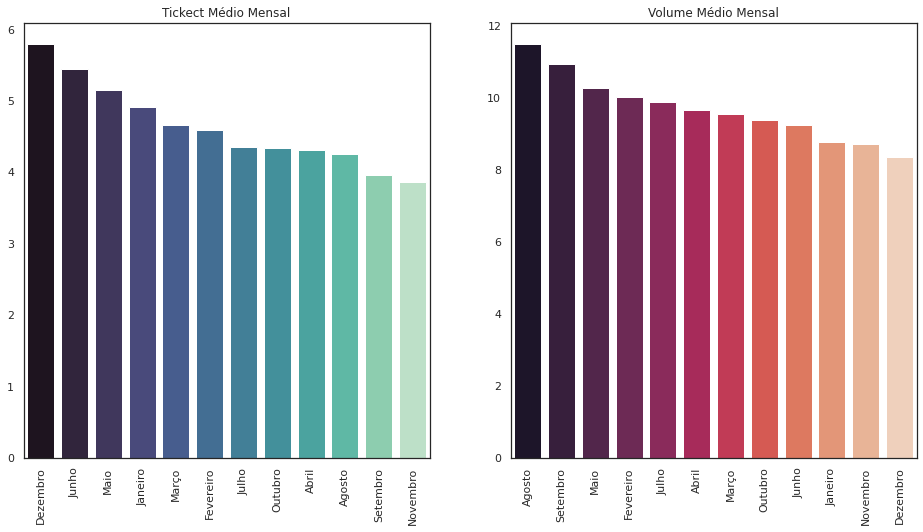

In [237]:
fig, axs = plt.subplots(ncols=2)

sns.barplot(x=questao2_1.index, y=questao2_1['Ticket Médio'].values, palette='mako', ax=axs[0])
ticks = axs[0].get_xticklabels()
axs[0].set_xticklabels(ticks, rotation=90)
axs[0].set_title('Tickect Médio Mensal')
axs[0].set_xlabel('')

sns.barplot(x=questao2_2.index, y=questao2_2['Volume Médio'].values, palette='rocket', ax=axs[1])
ticks = axs[1].get_xticklabels()
axs[1].set_xticklabels(ticks, rotation=90)
axs[1].set_title('Volume Médio Mensal')
axs[1].set_xlabel('');

### Questão 3

##### Existe alguma correlação entre o país e o volume de itens vendidos?

Podemos observar que a grande maioria dos pedidos são originados da Europa, predominantemente do Reino Unido, podemos afirmar que o mercado alvo seria primeiramente o mercado Inglês e depois Europa em geral que reperesentam a grande maioria dos itens comercializados.

In [239]:
questao3 = df.groupby('Country')[['Quantity']].sum().sort_values('Quantity', ascending=False)
round(questao3, 2)

,Quantity
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480
Australia,83653
Sweden,35637
Switzerland,30325
Spain,26824


##### Qual o item mais vendido e o menos vendido no país com maior volume de vendas?

##### Produto mais vendido

In [225]:
questao3_1 = df[df['Country'] == 'United Kingdom'].groupby('Description')[['Quantity']].sum().sort_values('Quantity', ascending=False)
questao3_1.head(1)

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326


##### Produto menos vendido 
Se o produto possui quantidade 0 ele não foi vendido, então o menos vendido tem que ser vendido pelo menos 1 vez

In [226]:
questao3_1[questao3_1['Quantity']>0].tail(1)

,Quantity
Description,
COUNTRY COTTAGE DOORSTOP GREEN,1


### Questão 4

##### A partir dos números apresentados e o seu conhecimento prévio, apresente ideais/estratégias que podem ser implementadas para auxiliar nossos lojistas a aumentarem o volume de vendas?

- Podemos oberservar pelas análises que as vendas estão centralizadas na Europa, majoritariamente na Inglaterra. Como já se tem uma atuação grande na Inglaterra, creio que expandir a atuação no mercado Europeu seria o primeiro passo.

- A Austrália possui aproximadamente 85 mil pedidos, poderia ser um próximo alvo de campanhas de Marketing, possuindo um Market Share maior que alguns países Europeus.

- A atuação nos mercados dos EUA e Brasil são bem baixas, e são mercados de grande potencial, que poderiam também ser trabalhados em campanhas de Marketing para aumentar a atuação dos lojistas em tais mercados, o que aumentaria considerávelmente os números de vendas.

- O Dataset possui dados aptos para a realização de Scripts de Mineiração de Dados como o RFV(Recência, Frequência e Valor). O RFV é um modelo de estudo de marketing para analisar o comportamento do cliente e agrupá-los em segmentações. Esses grupos de clientes (segmentações) são baseados em seus históricos de transações – o quão Recente (R), o quão Frequente (F) e o quanto de dinheiro um determinado cliente já gastou com você (M). O RFM ajuda a dividir os clientes em várias categorias para identificar quais deles possuem uma melhor taxa de de respostas para suas campanhas/promoções e também para futuras personalizações/novidades em seu serviço/produto.

- Também é possível aplicar o Market basket analysis (MBA) ou, em português, análise da cesta de compras, que é uma técnica de data mining que faz uso de regras de associação para identificar os hábitos de compra dos clientes, fornecendo uma visão da combinação de produtos dentro das cestas de compras dos clientes analisados, o que possibilitaria o desenvolvimento de um sistema de recomendação de produtos, que poder acarretar em uma alavancagem nos números de vendas.